Import the neccessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tabulate import tabulate

Data Loading

In [54]:
# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv("coin_ChainLink.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: The file was not found. Please make sure it's in the same directory.")
    exit()
df

Data loaded successfully!


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Chainlink,LINK,2017-09-21 23:59:59,0.207892,0.155292,0.189132,0.169680,2.126270e+06,5.938800e+07
1,2,Chainlink,LINK,2017-09-22 23:59:59,0.181675,0.139869,0.169826,0.150503,1.423220e+06,5.267605e+07
2,3,Chainlink,LINK,2017-09-23 23:59:59,0.157440,0.126297,0.149562,0.131129,1.186670e+06,4.589515e+07
3,4,Chainlink,LINK,2017-09-24 23:59:59,0.190250,0.130275,0.131110,0.170278,1.025740e+06,5.959730e+07
4,5,Chainlink,LINK,2017-09-25 23:59:59,0.182637,0.158580,0.170636,0.182198,1.021370e+06,6.376930e+07
...,...,...,...,...,...,...,...,...,...,...
1380,1381,Chainlink,LINK,2021-07-02 23:59:59,18.520256,17.305501,18.220669,18.283561,6.865419e+08,7.990091e+09
1381,1382,Chainlink,LINK,2021-07-03 23:59:59,18.886003,17.898075,18.285458,18.538818,5.090763e+08,8.101641e+09
1382,1383,Chainlink,LINK,2021-07-04 23:59:59,19.894503,18.028957,18.548805,19.262838,6.802681e+08,8.418044e+09
1383,1384,Chainlink,LINK,2021-07-05 23:59:59,19.246891,17.814752,19.246891,18.371589,6.986191e+08,8.028560e+09


Data Preprocessing

In [55]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Dupicated Rows")
print(df_duplicated)

# Drop rows with any missing values to ensure the data is clean
df.dropna(inplace=True)

# Rename the columns for clarity and consistency
df.rename(columns={
    "SNo":"serial_number",
    "Name":"name",
    "Symbol":"symbol",
    "Date":"date",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Close":"close",
    "Volume":"volume",
    "Marketcap":"marketcap"
},inplace=True)



df

Missing Values
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Dupicated Rows
0


,serial_number,name,symbol,date,high,low,open,close,volume,marketcap
0,1,Chainlink,LINK,2017-09-21 23:59:59,0.207892,0.155292,0.189132,0.169680,2.126270e+06,5.938800e+07
1,2,Chainlink,LINK,2017-09-22 23:59:59,0.181675,0.139869,0.169826,0.150503,1.423220e+06,5.267605e+07
2,3,Chainlink,LINK,2017-09-23 23:59:59,0.157440,0.126297,0.149562,0.131129,1.186670e+06,4.589515e+07
3,4,Chainlink,LINK,2017-09-24 23:59:59,0.190250,0.130275,0.131110,0.170278,1.025740e+06,5.959730e+07
4,5,Chainlink,LINK,2017-09-25 23:59:59,0.182637,0.158580,0.170636,0.182198,1.021370e+06,6.376930e+07
...,...,...,...,...,...,...,...,...,...,...
1380,1381,Chainlink,LINK,2021-07-02 23:59:59,18.520256,17.305501,18.220669,18.283561,6.865419e+08,7.990091e+09
1381,1382,Chainlink,LINK,2021-07-03 23:59:59,18.886003,17.898075,18.285458,18.538818,5.090763e+08,8.101641e+09
1382,1383,Chainlink,LINK,2021-07-04 23:59:59,19.894503,18.028957,18.548805,19.262838,6.802681e+08,8.418044e+09
1383,1384,Chainlink,LINK,2021-07-05 23:59:59,19.246891,17.814752,19.246891,18.371589,6.986191e+08,8.028560e+09


Features Engineering

In [56]:
# We'll use the "open", "high", and "low"
features = ["open","high","low"]
target = "close"

# Create the features matrix (X) and the target vector (y)
X = df[features]
y = df[target]

print("Features (X):",X.head())
print("Target:",y.head())
print("-"*50)

Features (X):        open      high       low
0  0.189132  0.207892  0.155292
1  0.169826  0.181675  0.139869
2  0.149562  0.157440  0.126297
3  0.131110  0.190250  0.130275
4  0.170636  0.182637  0.158580
Target: 0    0.169680
1    0.150503
2    0.131129
3    0.170278
4    0.182198
Name: close, dtype: float64
--------------------------------------------------


Visualization before Training

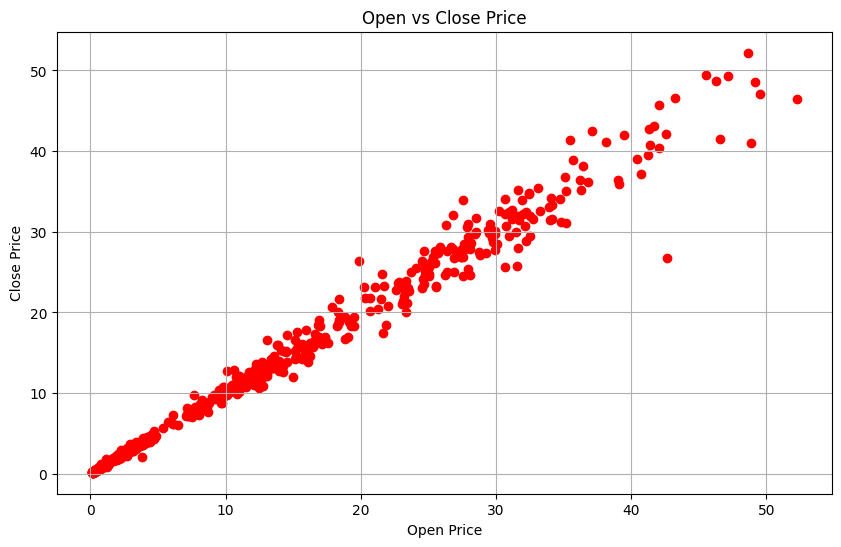

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(df["open"],df["close"],color="red")
plt.title("Open vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

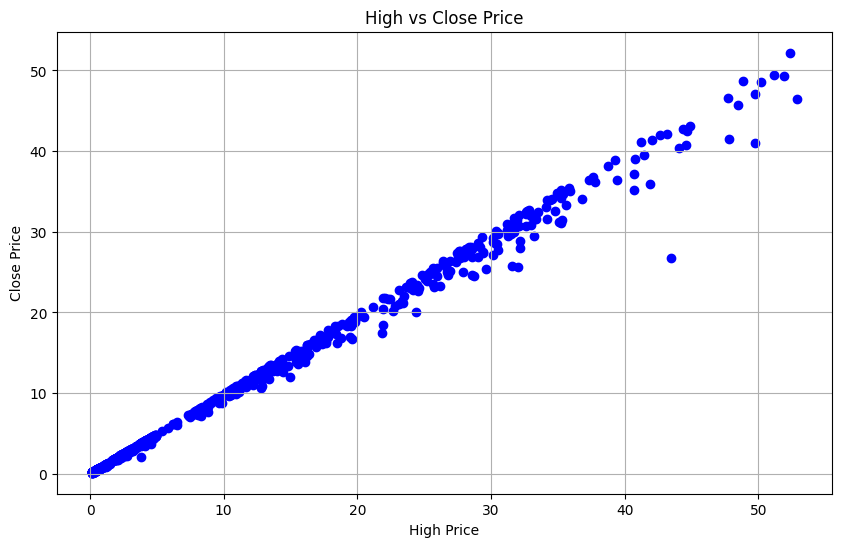

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(df["high"],df["close"],color="blue")
plt.title("High vs Close Price")
plt.xlabel("High Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

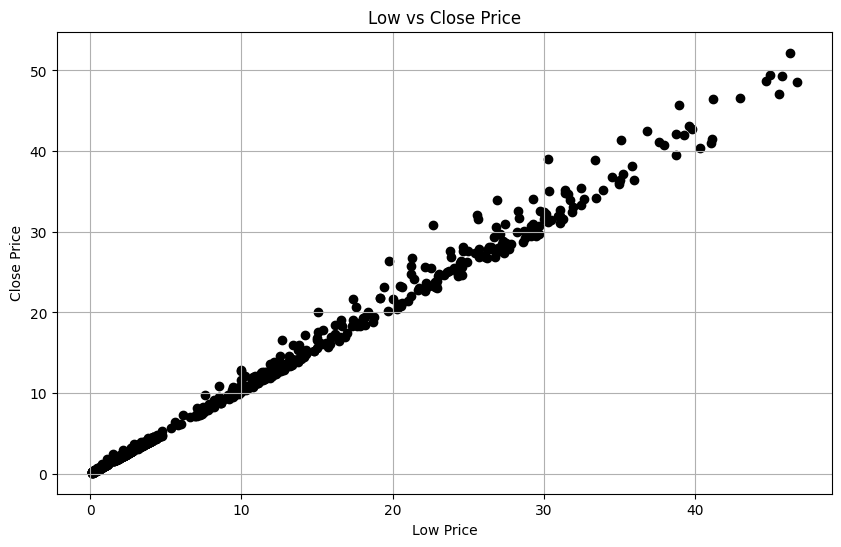

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(df["low"],df["close"],color="black")
plt.title("Low vs Close Price")
plt.xlabel("Low Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

Model Comparison and Evaluation

In [60]:
# We'll compare the three popular regression models to find the best one
# Define a dictionary of model to compare

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1)
}


# Use the K-Fold Cross-validation for a more robust evaluation
# It splits the  data into 5 parts and train/tests the model 5 times
# providing a more reliable performance score than a single train/test split

kf = KFold(n_splits=5,shuffle=True,random_state=42)

results = []
best_model = None
best_model = -np.inf

# Loop through each model to train and evaluate it
for name,model in models.items():
    print(f"Evaluating {name}....")

    # Calculate the R-squared score using cross-validation
    r2_scores = cross_val_score(model,X,y,cv=kf,scoring="r2")

    # Calculate the Mean Squared Error (MSE) using cross-validation
    # We use  a negative sign because scikit-learn's scoring is based on maximizing the score
    mse_scores = -cross_val_score(model,X,y,cv=kf,scoring="neg_mean_squared_error")

    # Calculate the Mean Absolute Error (MAE) using a cross-validation
    mae_scores = -cross_val_score(model,X,y,cv=kf,scoring="neg_mean_absolute_error")

    # Store the average scores
    results.append([
        name,
        np.mean(r2_scores),
        np.mean(mse_scores),
        np.mean(mae_scores)
    ])

    '''# Check if this is the best performing model so far based on R-squared
    if np.mean(r2_scores) > best_score:
        best_model = np.mean(r2_scores)
        best_model = model'''

# Print the comaparison results in a formatted table
headers = ["Model","Average R-squared","Average MSE","Average MAE"]
print("Model Comparion Results")
print(tabulate(results,headers=headers,floatfmt=".6f",tablefmt="grid"))
print('-'*50)
print("Maximum R-squared")
print(max(r2_scores))

Evaluating Linear Regression....
Evaluating Ridge Regression....
Evaluating Lasso Regression....
Model Comparion Results
+-------------------+---------------------+---------------+---------------+
| Model             |   Average R-squared |   Average MSE |   Average MAE |
+===================+=====================+===============+===============+
| Linear Regression |            0.998293 |      0.164236 |      0.146325 |
+-------------------+---------------------+---------------+---------------+
| Ridge Regression  |            0.998293 |      0.164241 |      0.146333 |
+-------------------+---------------------+---------------+---------------+
| Lasso Regression  |            0.997174 |      0.278635 |      0.198085 |
+-------------------+---------------------+---------------+---------------+
--------------------------------------------------
Maximum R-squared
0.9980225222489977


Data Splitting

In [61]:
# We'll use the 80% of the data for training and 20% for testing to evaluate the model performance.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Model Training

In [ ]:
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

y_pred_ridge = ridge_reg.predict(X_test)


Model Evaluation

In [63]:
# Ridge Regression Metrics
print("-----Ridge Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MAE: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MSE: {mean_absolute_error(y_test,y_pred_ridge):.4f}")

-----Ridge Regression-----
R-squared: 0.9990
MAE: 0.9990
MSE: 0.1252
